## YOLO Image Classification (**Y**ou **O**nly **L**ook **O**nce)

Uploding data from roboflow

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="X8usTSmbfyGyRfBAjcmY")
project = rf.workspace("data-for-project-1").project("rock-paper-scissors-sxsw-ipiom")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-1 in yolov11:: 100%|██████████| 10662/10662 [00:02<00:00, 3838.19it/s]


## Importing YOLO Model and Train

In [2]:
! pip install ultralytics #! işareti burayı terminal olarak kullanmamızı sağlar.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 21.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

model= YOLO("yolo11s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 123MB/s]


In [4]:
!ls

rock-paper-scissors-1  sample_data  yolo11s.pt


In [16]:
model.train(data="/content/data/data.yaml",epochs = 10,imgsz = 640,device="cuda")

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.2MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 4392 images, 1728 backgrounds, 0 corrupt: 100%|██████████| 4392/4392 [00:01<00:00, 2846.83it/s]


train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/data/valid/labels... 604 images, 255 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<00:00, 1439.90it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.37G      1.345      3.424      1.494          7        640: 100%|██████████| 275/275 [01:44<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]

                   all        604        414      0.503      0.372      0.372      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.37G      1.516      2.158      1.607          9        640: 100%|██████████| 275/275 [01:41<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.13it/s]

                   all        604        414      0.385      0.343      0.322      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.33G      1.477      1.911      1.545          6        640: 100%|██████████| 275/275 [01:41<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.02it/s]

                   all        604        414      0.476      0.372      0.377       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.36G      1.358      1.711      1.457          5        640: 100%|██████████| 275/275 [01:41<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.94it/s]

                   all        604        414      0.585      0.617      0.613      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.35G      1.262       1.45      1.374          3        640: 100%|██████████| 275/275 [01:37<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.85it/s]

                   all        604        414      0.695      0.679      0.732      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.36G      1.188      1.272      1.331          6        640: 100%|██████████| 275/275 [01:37<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        604        414      0.803      0.741      0.822      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.34G      1.096        1.1      1.244          5        640: 100%|██████████| 275/275 [01:37<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        604        414      0.801      0.742      0.832      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.36G      1.016     0.9396      1.196          6        640: 100%|██████████| 275/275 [01:37<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        604        414      0.836      0.823      0.876       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.35G     0.9479     0.8391      1.151          4        640: 100%|██████████| 275/275 [01:37<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.15it/s]

                   all        604        414      0.835      0.833      0.871      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.36G     0.8847     0.7206      1.102          5        640: 100%|██████████| 275/275 [01:37<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.25it/s]

                   all        604        414      0.909      0.879      0.908      0.696



10 epochs completed in 0.299 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 19.1MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 19.1MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.46it/s]


                   all        604        414      0.909      0.879      0.909      0.695
                 Paper        138        145      0.893      0.861      0.892      0.697
                  Rock        126        148      0.932      0.892      0.907      0.676
              Scissors        117        121      0.901      0.884      0.927      0.712
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train10


NameError: name 'content' is not defined

### Kaydedilen eğitilmiş best.pt modelimizi kullanma

In [47]:
from ultralytics import YOLO

model=YOLO("/content/runs/detect/train10/weights/best.pt") #şu an best modelimizi yani doğruluk payı en yüksek olan modeli elimize aldık.

In [48]:
result= model.predict(source="/content/images",save=True,save_dir="/content/runs/predict") #tahmin fotografları olusturuldu


image 1/16 /content/images/WIN_20250120_16_07_24_Pro.jpg: 384x640 2 Rocks, 1549.6ms
image 2/16 /content/images/WIN_20250120_16_07_30_Pro.jpg: 384x640 2 Papers, 1 Scissors, 10.5ms
image 3/16 /content/images/WIN_20250120_16_07_33_Pro.jpg: 384x640 1 Paper, 1 Scissors, 8.7ms
image 4/16 /content/images/WIN_20250120_16_07_35_Pro.jpg: 384x640 2 Scissorss, 9.2ms
image 5/16 /content/images/WIN_20250120_16_07_37_Pro.jpg: 384x640 2 Papers, 8.6ms
image 6/16 /content/images/WIN_20250120_16_07_40_Pro.jpg: 384x640 1 Paper, 8.8ms
image 7/16 /content/images/WIN_20250120_16_07_43_Pro.jpg: 384x640 1 Paper, 1 Scissors, 8.9ms
image 8/16 /content/images/WIN_20250120_16_07_48_Pro.jpg: 384x640 1 Rock, 1 Scissors, 10.7ms
image 9/16 /content/images/WIN_20250120_16_07_51_Pro.jpg: 384x640 1 Rock, 1 Scissors, 8.8ms
image 10/16 /content/images/WIN_20250120_16_07_54_Pro.jpg: 384x640 1 Paper, 1 Rock, 10.4ms
image 11/16 /content/images/WIN_20250120_16_07_56_Pro.jpg: 384x640 1 Paper, 1 Rock, 8.9ms
image 12/16 /content

In [50]:
import matplotlib.pyplot as plt
import os

imagePath="/content/runs/detect/predict2"

imagePathsList=[]
for file in os.listdir(imagePath):
  if file.lower().endswith(('png', 'jpg', 'jpeg')):
    imagePathsList.append(os.path.join(imagePath, file))
print(imagePathsList)


['/content/runs/detect/predict2/WIN_20250120_16_07_56_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_30_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_08_20_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_48_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_37_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_08_14_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_43_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_08_24_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_33_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_40_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_51_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_24_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_35_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_08_03_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_08_09_Pro.jpg', '/content/runs/detect/predict2/WIN_20250120_16_07_54_P

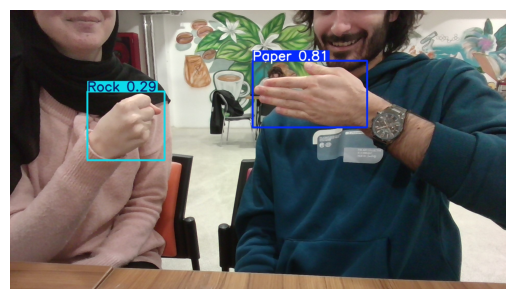

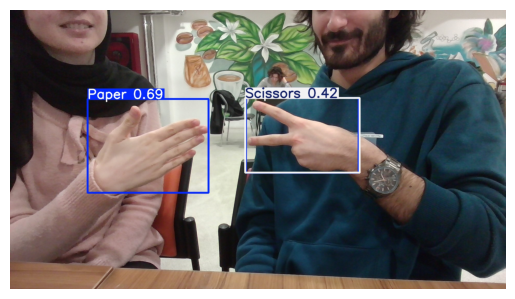

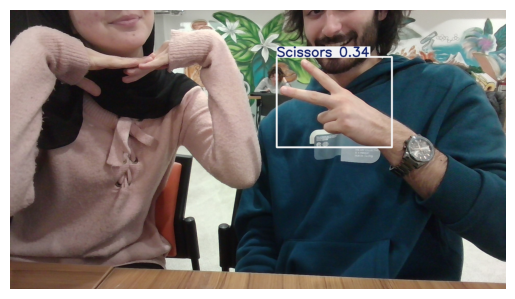

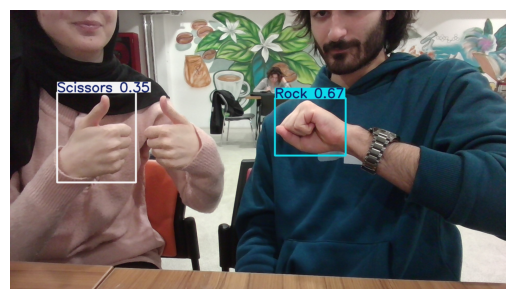

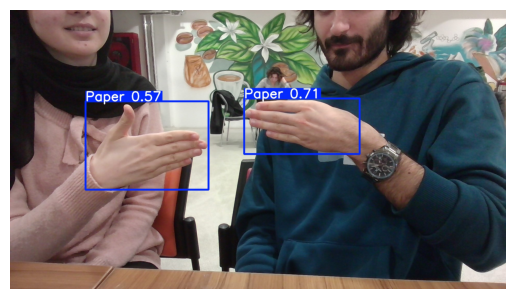

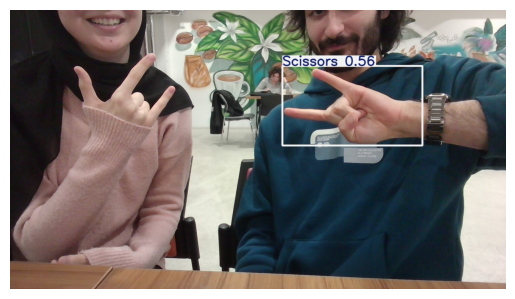

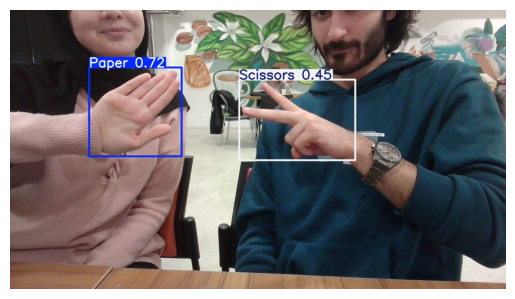

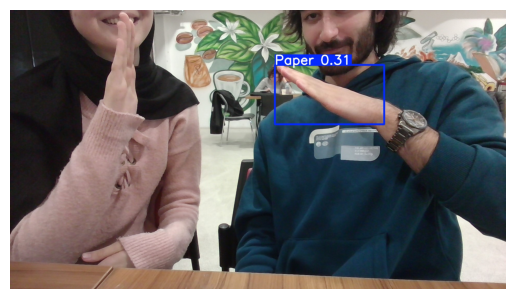

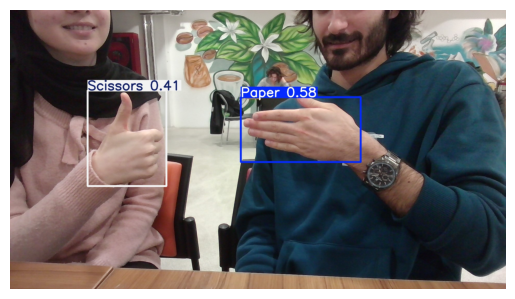

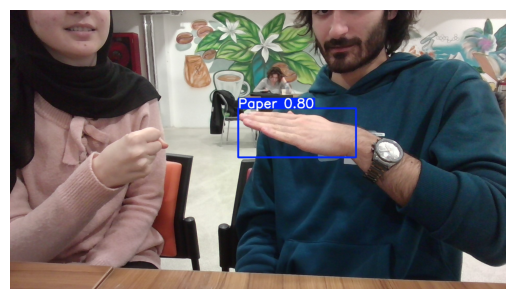

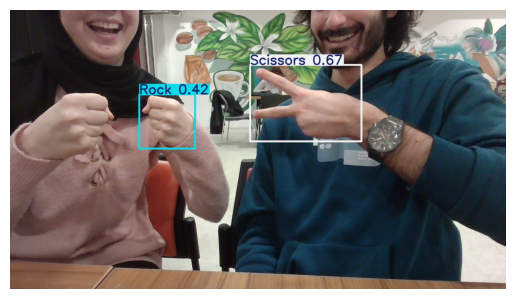

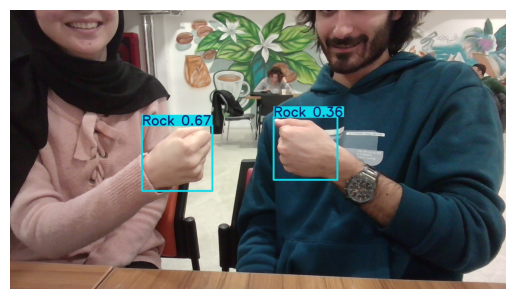

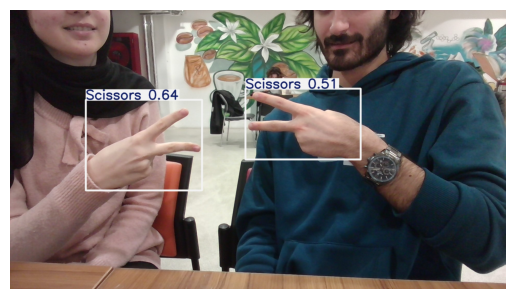

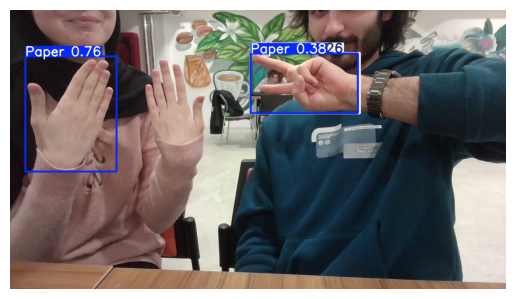

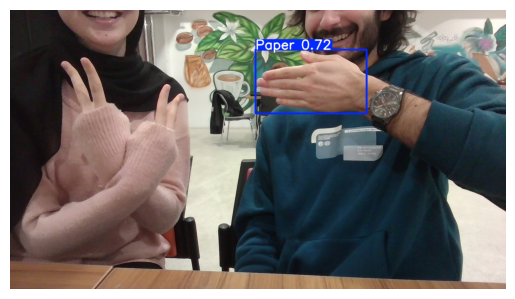

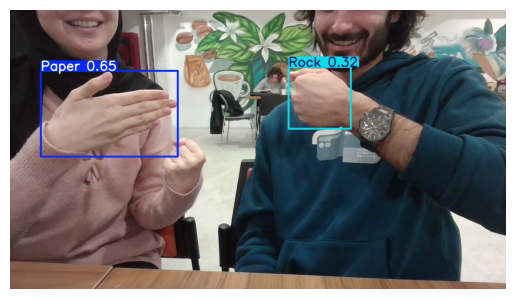

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for imagePath in imagePathsList:
  image=mpimg.imread(imagePath)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

